In [3]:
import pandas as pd
import json

### Read Data

In [4]:
# data containing all product category
data= pd.read_json('computers_train_xlarge.json' , lines=True)

In [5]:
# gold standard data for all categories
data_gs= pd.read_json('computers_gs.json' , lines=True)

In [6]:
# test set containing all categories
test_set = pd.read_json('task1_testset_1500_with_labels.json' , lines=True)

### VIEW WHAT THE DATA LOOK LIKE

In [7]:
data.head(2)

,id_left,category_left,cluster_id_left,id_right,category_right,cluster_id_right,label,pair_id,brand_left,brand_right,description_left,description_right,keyValuePairs_left,keyValuePairs_right,price_left,price_right,specTableContent_left,specTableContent_right,title_left,title_right
0,2551242,Computers_and_Accessories,79457,16272671,Computers_and_Accessories,79457,1,2551242#16272671,"""Corsair""@en",None,"""DDR4, 2666MHz, CL16, 1.2v, XMP 2.0, Lifetime ...",None,"{'Memory Type': 'DDR4 (PC4-21300)', 'Capacity'...","{'Categorie': 'Geheugen intern', 'Merk': 'Cors...",None,None,Memory Type DDR4 (PC4-21300) Capacity 64GB (4...,Categorie Geheugen intern Merk Corsair Produc...,"""Corsair Vengeance LPX Black 64GB (4x16GB) DD...","""Corsair Vengeance LPX CMK64GX4M4A2666C16 - P..."
1,16757469,Computers_and_Accessories,63553,16476204,Computers_and_Accessories,63553,1,16757469#16476204,"""HP Enterprise""","""HP Enterprise""","""Description:2 x 72GB 2.5-inch Serial Attached...","""Description:10 x 72GB 2.5-inch Serial Attach...","{'Category': 'Proliant HardDrive', 'Sub-Catego...","{'Category': 'Proliant HardDrive', 'Sub-Catego...",None,"""CAD"", ""$757.74 CAD""",Specifications: Category Proliant HardDrive S...,Specifications: Category Proliant HardDrive S...,"""DH0072BALWL HP 72-GB 3G 15K 2.5 DP SAS"", ""Nu...","""DH0072BALWL HP 72-GB 3G 15K 2.5 DP SAS"" ""Null"""


In [8]:
test_set.head(2)

,id_left,cluster_id_left,category_left,title_left,description_left,brand_left,price_left,keyValuePairs_left,specTableContent_left,id_right,...,category_right,title_right,description_right,brand_right,price_right,keyValuePairs_right,specTableContent_right,label,pair_id,sampling
0,4210789,533129,Computers_and_Accessories,"""Intel X520-DA2 PCI Express 2.0 Network Adapt...","""Intel's family of adapter, the Intel' Etherne...",None,"""$"", ""333.16""",None,None,6428629,...,Computers_and_Accessories,"""Intel X520-DA2 Dual Port Gigabit SFP Etherne...","""2 Port Intel E10G42BTDA 10 Gigabit SFP Ethern...",None,None,None,None,1,4210789#6428629,high similarity with old products
1,8813989,55385,Computers_and_Accessories,"""Zotac GeForce GTX 1070Ti AMP Extreme 8192MB ...","""ZT-P10710B-10P, Core Clock: 1607MHz, Boost Cl...","""Zotac""@en",None,None,None,4435647,...,Computers_and_Accessories,"""Zotac NVIDIA GeForce GTX 1070 Ti 8GB AMP! Ex...","""Zotac GeForce GTX 1070 Ti AMP! Extreme Editio...",None,None,None,None,1,8813989#4435647,high similarity with old products


In [9]:
test_set.columns


Index(['id_left', 'cluster_id_left', 'category_left', 'title_left',
       'description_left', 'brand_left', 'price_left', 'keyValuePairs_left',
       'specTableContent_left', 'id_right', 'cluster_id_right',
       'category_right', 'title_right', 'description_right', 'brand_right',
       'price_right', 'keyValuePairs_right', 'specTableContent_right', 'label',
       'pair_id', 'sampling'],
      dtype='object')

In [10]:
data_gs.head(2)

,id_left,category_left,cluster_id_left,identifiers_left,id_right,category_right,cluster_id_right,identifiers_right,label,pair_id,...,description_left,description_right,keyValuePairs_left,keyValuePairs_right,price_left,price_right,specTableContent_left,specTableContent_right,title_left,title_right
0,581109,Computers_and_Accessories,1324529,"[{'/mpn': '[gvrx480g1gaming4gd]'}, {'/gtin13':...",16637861,Computers_and_Accessories,107415,"[{'/mpn': '[gvrx550gamingoc2gd]'}, {'/gtin13':...",0,581109#16637861,...,"""GV-RX480G1 GAMING-4GD, Core Clock: 1202MHz, B...","""GV-RX550GAMING OC-2GD, Boost: 1219MHz, Memory...",None,None,None,None,None,None,"""Gigabyte Radeon RX 480 G1 Gaming 4096MB GDDR...","""Gigabyte Radeon RX 550 Gaming OC 2048MB GDDR..."
1,3083228,Computers_and_Accessories,640007,"[{'/mpn': '[9hlf4lbdbe]'}, {'/gtin13': '[47187...",3424944,Computers_and_Accessories,640007,"[{'/mpn': '[9hlf4lbdbe]'}, {'/gtin13': '[47187...",1,3083228#3424944,...,"""\n More>>>\n \n...","""\n\n Every det...",None,None,None,None,None,None,"""Benq ZOWIE RL2455 24"" Full HD TN Grey comput...","""Zowie RL2455 E-Sports 24"" Full HD LED Monito..."


## View the shape of each dataset 


In [11]:
data.shape

(68461, 20)

In [12]:
test_set.shape

(1500, 21)

In [13]:
data_gs.shape

(1100, 22)

- As we can see above, each data have different number of columns. On a closer look, the column "sampling" is present in the test_set, but missing in the remaining two columns. 
- Also, the columns "identifiers_left" and "identifiers_right" are present data_gs , but missing in test_set. we need to drop the columns "sampling" , "identifiers_left" and "identifiers_right"


In [14]:
data.head()

,id_left,category_left,cluster_id_left,id_right,category_right,cluster_id_right,label,pair_id,brand_left,brand_right,description_left,description_right,keyValuePairs_left,keyValuePairs_right,price_left,price_right,specTableContent_left,specTableContent_right,title_left,title_right
0,2551242,Computers_and_Accessories,79457,16272671,Computers_and_Accessories,79457,1,2551242#16272671,"""Corsair""@en",None,"""DDR4, 2666MHz, CL16, 1.2v, XMP 2.0, Lifetime ...",None,"{'Memory Type': 'DDR4 (PC4-21300)', 'Capacity'...","{'Categorie': 'Geheugen intern', 'Merk': 'Cors...",None,None,Memory Type DDR4 (PC4-21300) Capacity 64GB (4...,Categorie Geheugen intern Merk Corsair Produc...,"""Corsair Vengeance LPX Black 64GB (4x16GB) DD...","""Corsair Vengeance LPX CMK64GX4M4A2666C16 - P..."
1,16757469,Computers_and_Accessories,63553,16476204,Computers_and_Accessories,63553,1,16757469#16476204,"""HP Enterprise""","""HP Enterprise""","""Description:2 x 72GB 2.5-inch Serial Attached...","""Description:10 x 72GB 2.5-inch Serial Attach...","{'Category': 'Proliant HardDrive', 'Sub-Catego...","{'Category': 'Proliant HardDrive', 'Sub-Catego...",None,"""CAD"", ""$757.74 CAD""",Specifications: Category Proliant HardDrive S...,Specifications: Category Proliant HardDrive S...,"""DH0072BALWL HP 72-GB 3G 15K 2.5 DP SAS"", ""Nu...","""DH0072BALWL HP 72-GB 3G 15K 2.5 DP SAS"" ""Null"""
2,232007,Computers_and_Accessories,212917,16442945,Computers_and_Accessories,14319765,0,232007#16442945,"""SanDisk""","""HP Enterprise""","""SDSDJ-1024 BXP 1GB 9p SD Class 2 Secure Digi...","""Description:Genuine HPE 1GB FBD PC2-5300(2x5...",None,"{'Category': 'Proliant Memory', 'Sub-Category'...","""USD"", ""7.98""","""USD"", ""$69.95""",None,Specifications: Category Proliant Memory Sub-...,"""SanDisk SDSDJ-1024 BXP 1GB 9p SD Class 2 Sec...","""397409-B21 HP 1GB (2x512MB) PC2-5300 SDRAM"" ..."
3,2066119,Computers_and_Accessories,667772,12411100,Computers_and_Accessories,667772,1,2066119#12411100,None,"""KINGSTON""","""DISCO DURO INTERNO SOLIDO HDD SSD""@es",None,None,None,None,None,None,None,"""DISCO DURO INTERNO SOLIDO HDD SSD KINGSTON V...","""DISCO DURO SSD Kingston Technology SSDNow V3..."
4,6656540,Computers_and_Accessories,505997,2639431,Computers_and_Accessories,154118,0,6656540#2639431,None,"""Corsair""",None,None,None,None,None,None,None,None,"""Corsair Vengeance LED 32GB (2 x 16GB) DDR4 D...","""Corsair - Vengeance LPX 32GB (2 x 16GB) DDR4..."


In [15]:
data_gs = data_gs.drop(['identifiers_right' , 'identifiers_left'] , axis=1)

In [16]:
test_set = test_set.drop(['sampling'] , axis=1)

## View the new shape of the data

In [17]:
data.shape

(68461, 20)

In [18]:
1- 1450/68461

0.9788200581352887

In [19]:
test_set.shape

(1500, 20)

In [20]:
data_gs.shape

(1100, 20)

### VIEW THE EXTENT OF MISSING DATA

#### columns with missing data in data dataset

In [21]:
print("Are there any null values?")
print(data.isnull().values.any() , "\n")
#Find out how many - This gives you the breakdown per column
print('How many null values are in each column?'),
print(data.isnull().sum(), "\n")
#Get total overall null values
print('How many null values are in the data in total?')
print(data.isnull().sum().sum())

Are there any null values?
True 

How many null values are in each column?
id_left                       0
category_left                 0
cluster_id_left               0
id_right                      0
category_right                0
cluster_id_right              0
label                         0
pair_id                       0
brand_left                34228
brand_right               34216
description_left          21001
description_right         20101
keyValuePairs_left        49696
keyValuePairs_right       48186
price_left                56940
price_right               56969
specTableContent_left     47564
specTableContent_right    46304
title_left                    0
title_right                   0
dtype: int64 

How many null values are in the data in total?
415205


#### columns with missing data in test_set dataset

In [22]:
print("Are there any null values in the test_set?")
print(test_set.isnull().values.any() , "\n")
#Find out how many - This gives you the breakdown per column
print('How many null values are in each column?'),
print(test_set.isnull().sum(), "\n")
#Get total overall null values
print('How many null values are in the data in total?')
print(test_set.isnull().sum().sum())

Are there any null values in the test_set?
True 

How many null values are in each column?
id_left                      0
cluster_id_left              0
category_left                0
title_left                   0
description_left           167
brand_left                 635
price_left                1161
keyValuePairs_left        1025
specTableContent_left      995
id_right                     0
cluster_id_right             0
category_right               0
title_right                  0
description_right          219
brand_right                644
price_right               1156
keyValuePairs_right       1076
specTableContent_right    1030
label                        0
pair_id                      0
dtype: int64 

How many null values are in the data in total?
8108


#### columns with missing data in Gold standard dataset

In [23]:
print("Are there any null values in the data_gs?")
print(data_gs.isnull().values.any() , "\n")
#Find out how many - This gives you the breakdown per column
print('How many null values are in each column?'),
print(data_gs.isnull().sum(), "\n")
#Get total overall null values
print('How many null values are in the data in total?')
print(data_gs.isnull().sum().sum())

Are there any null values in the data_gs?
True 

How many null values are in each column?
id_left                     0
category_left               0
cluster_id_left             0
id_right                    0
category_right              0
cluster_id_right            0
label                       0
pair_id                     0
brand_left                438
brand_right               460
description_left           78
description_right         140
keyValuePairs_left        719
keyValuePairs_right       766
price_left                846
price_right               840
specTableContent_left     698
specTableContent_right    736
title_left                  0
title_right                 0
dtype: int64 

How many null values are in the data in total?
5721


## Drop Missing data

In [24]:
data1=data.dropna()
test_set1= test_set.dropna()
data_gs1 =data_gs.dropna()

## View the shape of the remaining datasets

In [25]:
data1.shape

(1450, 20)

In [26]:
test_set1.shape

(59, 20)

In [27]:
1- 49/1100

0.9554545454545454

In [28]:
data_gs1.shape

(49, 20)

## Comment
- As we can see above the missing values are too much. For data dataset, about 98 percent of the data are gone
- for test_set , 96 percent are deleted.
- Also ,in the gold standard dataset , 96 percent of the dataset have been phased out.

- The remaining data is not enough for training most machine learning algorithms and also might not be enough to model the    whole dataset
- We might need to drop the columns with too many missing data
- in the data dataset, the following six columns each having over 40,000 missing values.
- The columns are: SpecTableContent_left , SpecTableContent_right , KeyValuePairs_left, keyValuePairs_right , price_left , and price_right

## USING COLUMNS WITH LESS THAN 40,000 MISSING VALUES

#### Dropping the six columns in the dataset

In [29]:
data2 = data.drop(['specTableContent_left' , 'specTableContent_right' , 'keyValuePairs_left' , 'keyValuePairs_right' , 'price_left' , 'price_right'] , axis=1)

In [30]:
test_set2= test_set.drop(['specTableContent_left' , 'specTableContent_right' , 'keyValuePairs_left' , 'keyValuePairs_right' , 'price_left' , 'price_right'] , axis=1)

In [31]:
data_gs2= data_gs.drop(['specTableContent_left' , 'specTableContent_right' , 'keyValuePairs_left' , 'keyValuePairs_right' , 'price_left' , 'price_right'] , axis=1)

## Drop Missing values in the new datasets above

In [32]:
data2=data2.dropna()
test_set2= test_set2.dropna()
data_gs2 =data_gs2.dropna()

In [33]:
data2.shape

(14834, 14)

In [34]:
test_set2.shape

(587, 14)

In [35]:
data_gs2.shape

(446, 14)

### VIEW SOME DATA PARAMETERS

- COUNT OF ZEROS AND ONES IN LABEL COLUMN FOR data2

In [36]:
data2.label.value_counts(normalize=True)

0    0.848726
1    0.151274
Name: label, dtype: float64

- Plot of label: 0 for non matching 1 for matching for data2

<AxesSubplot:>

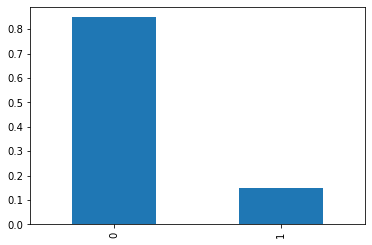

In [37]:
data2.label.value_counts(normalize=True).sort_index().plot(kind='bar')

- COUNT OF ZEROS AND ONES IN LABEL COLUMN FOR test_set2

In [38]:
test_set2.label.value_counts(normalize=True)

0    0.759796
1    0.240204
Name: label, dtype: float64

- Plot of label: 0 for non matching 1 for matching for test_set2

<AxesSubplot:>

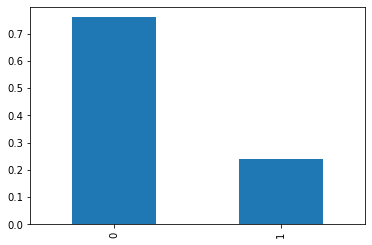

In [39]:
test_set2.label.value_counts(normalize=True).sort_index().plot(kind='bar')

- COUNT OF ZEROS AND ONES IN LABEL COLUMN FOR data_gs2

In [40]:
data_gs2.label.value_counts(normalize=True)

0    0.784753
1    0.215247
Name: label, dtype: float64

- Plot of label: 0 for non matching 1 for matching for data_gs2

<AxesSubplot:>

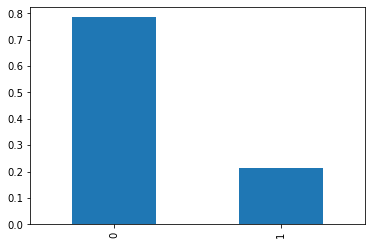

In [41]:
data_gs2.label.value_counts(normalize=True).sort_index().plot(kind='bar')

## Merging of columns
- we need to merge all the columns (except label column) together to form two columns: product_feature and label

In [42]:
data2['product_feature'] = str(data2['id_left']) + " " + data2['title_left'] +" " + data2['description_left'] + " " + data2['brand_left'] + " " + data2['category_left'] + " " + str(data2['cluster_id_left']) + " " + str(data2['id_right']) + " " + data2['title_right'] + " " + data2['description_right'] + " " + data2['brand_right'] + " " + data2['category_right'] +" " + str(data2['cluster_id_right']) + " " + str(data2['pair_id'])
data2.drop(data2.columns.difference(['product_feature','label']), 1, inplace=True)

C:\Users\pc\AppData\Local\Temp/ipykernel_20796/144590819.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data2.drop(data2.columns.difference(['product_feature','label']), 1, inplace=True)


In [43]:
test_set2['product_feature'] = str(test_set2['id_left']) + " " + test_set2['title_left'] +" " + test_set2['description_left'] + " " + test_set2['brand_left'] + " " + test_set2['category_left'] + " " + str(test_set2['cluster_id_left']) + " " + str(test_set2['id_right']) + " " + test_set2['title_right'] + " " + test_set2['description_right'] + " " + test_set2['brand_right'] + " " + test_set2['category_right'] +" " + str(test_set2['cluster_id_right']) + " " + str(test_set2['pair_id'])
test_set2.drop(test_set2.columns.difference(['product_feature','label']), 1, inplace=True)

C:\Users\pc\AppData\Local\Temp/ipykernel_20796/2586597507.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_set2.drop(test_set2.columns.difference(['product_feature','label']), 1, inplace=True)


In [44]:
data_gs2['product_feature'] = str(data_gs2['id_left']) + " " + data_gs2['title_left'] +" " + data_gs2['description_left'] + " " + data_gs2['brand_left'] + " " + data_gs2['category_left'] + " " + str(data_gs2['cluster_id_left']) + " " + str(data_gs2['id_right']) + " " + data_gs2['title_right'] + " " + data_gs2['description_right'] + " " + data_gs2['brand_right'] + " " + data_gs2['category_right'] +" " + str(data_gs2['cluster_id_right']) + " " + str(data_gs2['pair_id'])
data_gs2.drop(data_gs2.columns.difference(['product_feature','label']), 1, inplace=True)

C:\Users\pc\AppData\Local\Temp/ipykernel_20796/4108320089.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_gs2.drop(data_gs2.columns.difference(['product_feature','label']), 1, inplace=True)


In [45]:
data2.head()

,label,product_feature
1,1,1 16757469\n2 232007\n9 ...
2,0,1 16757469\n2 232007\n9 ...
9,0,1 16757469\n2 232007\n9 ...
10,1,1 16757469\n2 232007\n9 ...
15,0,1 16757469\n2 232007\n9 ...


In [46]:
test_set2.head()

,label,product_feature
5,1,5 10372598\n9 3483338\n10 16...
9,1,5 10372598\n9 3483338\n10 16...
10,1,5 10372598\n9 3483338\n10 16...
12,1,5 10372598\n9 3483338\n10 16...
21,1,5 10372598\n9 3483338\n10 16...


In [47]:
data_gs2.head()

,label,product_feature
0,0,0 581109\n1 3083228\n7 1...
1,1,0 581109\n1 3083228\n7 1...
7,0,0 581109\n1 3083228\n7 1...
10,0,0 581109\n1 3083228\n7 1...
11,1,0 581109\n1 3083228\n7 1...


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# sample product data
products = [
    "iPhone 11, 64GB, Black",
    "Samsung Galaxy S21, 128GB, Gray",
    "iPhone 12, 128GB, Blue",
    "Samsung Galaxy Note 20, 256GB, Black"
]

# create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# transform the product data into TF-IDF vectors
tfidf = vectorizer.fit_transform(data2.product_feature)

# calculate the cosine similarity between the products
cosine_similarities = cosine_similarity(tfidf)

# print the cosine similarity matrix
print(cosine_similarities)


MemoryError: Unable to allocate 1.64 GiB for an array with shape (14834, 14834) and data type float64

## LEARNING THE VOCABULARY

#### defining the function to remove punctuation

In [53]:
import re
import string
string.punctuation
#library that contains punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#### Apply the function remove_punctuation to column "prod_left_right" in new_data set and new_test set

In [54]:
data2['product_feature'] = data2['product_feature'].apply(lambda x:remove_punctuation(x))
test_set2['product_feature'] = test_set2['product_feature'].apply(lambda x:remove_punctuation(x))
data_gs2['product_feature'] = data_gs2['product_feature'].apply(lambda x:remove_punctuation(x))

#### Generate stopwords

In [55]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords=stopwords.words('english')

### Generate Stemmer

In [56]:
import nltk
from nltk.tokenize import word_tokenize #to tokenize the column
from nltk.stem.snowball import SnowballStemmer # To stem the each word
stemmer= SnowballStemmer(language='english')


In [57]:
word_tokenize("we are not coming")

['we', 'are', 'not', 'coming']

### Define tokenizer function with stemmer

In [58]:
def tokenize(text):
            return [stemmer.stem(token) for token in word_tokenize(text)]

In [59]:
tokenize("we are not coming")

['we', 'are', 'not', 'come']

#### Create a Tf-Idf instance

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize , 
                             stop_words=english_stopwords,
                            ngram_range=(1,1) #, max_features=2000
                            )

#### Passing in the text into vectorizer


In [61]:
vectorizer.fit(data2.product_feature)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x000001969BC380D0>)

#### View the first 200 features of the first row

In [62]:
vectorizer.get_feature_names()[:200]

['0',
 '000',
 '00003',
 '0001',
 '001',
 '0065030785341',
 '008in',
 '009',
 '015',
 '018',
 '0326',
 '04',
 '043in',
 '049',
 '04in',
 '04in（1499毫米x1092毫米x102毫米）工作温度：13ºf到85°c（25°c至85°c）存储温度：40ºf到85°c（40°c至85°c）兼容性：兼容所有的microsdhc，microsdxc和microsdhc',
 '05',
 '054',
 '055',
 '059in',
 '05em',
 '05gb',
 '05m',
 '05w',
 '068in',
 '069l',
 '06adimensõ',
 '06gp46163kr',
 '0709',
 '073',
 '075em',
 '079in',
 '07em',
 '08',
 '0829160999111',
 '084',
 '08gp46180kr',
 '08gp46180kren',
 '091',
 '09c',
 '09thick',
 '0mben',
 '0px',
 '0pximg',
 '0pxop',
 '0°c',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '10000mhz',
 '10001',
 '1000basesx',
 '1000mbit',
 '1000mbps',
 '1000mbpsideal',
 '1000mw',
 '1000sx',
 '1000x',
 '10010mhz',
 '100basetx',
 '100cdq80sp',
 '100d',
 '100dpi',
 '100gb',
 '100k80k',
 '100mbps',
 '100mbs',
 '100mbsen',
 '100mmredefin',
 '100percent',
 '100r',
 '100w',
 '100x100mm',
 '101',
 '1010',
 '10100',
 '101001000',
 '101001000mbps',
 '101001000mbpsauto',
 '101001000t',
 '10100

### Transform Training , gold standard data and test data

#### Transform training data

In [63]:
inputs= vectorizer.transform(data2.product_feature)

In [64]:
inputs.shape

(14834, 11940)

#### Transform test data

In [65]:
test_inputs= vectorizer.transform(test_set2.product_feature)

In [66]:
test_inputs.shape

(587, 11940)

#### Transform gold standard data

In [67]:
gs_inputs= vectorizer.transform(data_gs2.product_feature)

In [68]:
gs_inputs.shape

(446, 11940)

#### Split the Training data into train and validation 

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train , X_val , y_train , y_val = train_test_split(inputs , data2.label , test_size= 0.3 , random_state=42)

In [71]:
X_train

<10383x11940 sparse matrix of type '<class 'numpy.float64'>'
	with 1345852 stored elements in Compressed Sparse Row format>

In [72]:
len(Y_train)

NameError: name 'Y_train' is not defined

#### Test data

In [ ]:
X_test=test_inputs 
y_test = test_set2.label

In [ ]:
X_train , X_val , y_train , y_val = train_test_split(inputs , data2.label , test_size= 0.3 , random_state=42)

X_test=test_inputs 
y_test = test_set2.label

X_gs =gs_inputs
y_gs= data_gs2.label

In [ ]:
X_test

#### gold standard data

In [ ]:
X_gs =gs_inputs
y_gs= data_gs2.label

### Initial Accuracy Test for Potential Models using K fold Evaluation

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='sag')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt



seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))


#Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed , shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_train , y_train.ravel(), cv=kfold, scoring=scoring)
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_val)
    
    results.append(cv_results)
    names.append(name)
    print('Model Name: ' , name)
    print('Cross value mean: ' , cv_results.mean())
    print('Cross value Standard Deviation: ', cv_results.std())
    print('\nClassification Report')
    print(classification_report(y_val, Y_pred))
    print('=================================================================\n')
    
    


### Boxplot for comparison

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Having applied KFold Validation to a number of possible classification algorithms, we have a strong accuracy rating from the following models:
###### Logistic Regression , Random Forests , K Nearest Neighbour , Decision Tree Classifier

we will select Random Forest because it has the highest accuracy.


### Fit the Random Forest Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score , roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
model = RandomForestClassifier(n_estimators= 10 , random_state=42)
model.fit(X_train , y_train )

### Evaluate model using validation set

In [ ]:
#predicted y
y_val_pred = model.predict(X_val)

In [ ]:
confusion_matrix(y_val, y_val_pred)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_val, y_val_pred), model.classes_).plot()

In [ ]:
accuracy_score(y_val, y_val_pred)

In [ ]:
print(metrics.classification_report(y_val, y_val_pred, target_names=['nonmatch', 'match']))

- Interpretation of the above reports
The total number of data point is 8683.
The number of labels that are non match is 7202
The number of label that are matching is 1481
From the above confusion matrix let’s get the four numbers:

True Positives: 449 ,meaning the model correctly classified 449 positive class data points.
True Negatives: 156 ,meaning the model correctly classified 156 negative class data points.
False Positives: 121 ,meaning the model incorrectly classified 121 negative class data points as belonging to the positive class.
False Negatives: 1032 ,meaning the model incorrectly classified 1032 positive class data points as belonging to the negative class
- The data is an imbalanced data. The Imbalanced datasets involve datasets that have a significant deviation of the percentage of rows between the majority and minority classes present. F1 score is good enough to measure the accuracy of model of that were fitted on imbalanced data.
- The F1 score is 87% , this means that the overall model performance is 87%

### Hyperparameter Tuning for Random Forest using Randomised Search

###  Implementing Random Search Using Scikit-Learn
##### Defining the Hyperparameter Space

In [ ]:
from scipy.stats import randint
import numpy as np
rs_space={'max_depth':list(np.arange(1, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train,y_train)

In [ ]:
print('Best grid search hyperparameters are: '+str(model_random.best_params_))
print('Best grid search score is: '+str(model_random.best_score_))

### Fitting model with the best parameters

In [ ]:
rf_best = RandomForestClassifier(criterion='gini' ,max_features=6,min_samples_leaf=1,min_samples_split=2,n_estimators=260 )
rf_best.fit(X_train , y_train )

In [ ]:
### Evaluate model on validation data

In [ ]:
y_pred= rf_best.predict(X_val)

In [ ]:
print("Accuracy = " , metrics.accuracy_score(y_val, y_pred))

In [ ]:
confusion_matrix(y_val, y_pred)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred), model.classes_).plot()

In [ ]:
print(metrics.classification_report(y_val, y_pred, target_names=['nonmatch', 'match']))

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate the ROC score
roc_score = roc_auc_score(y_val, y_pred)

# Print the ROC score
print("ROC Score: {:.4f}".format(roc_score))

### Evaluate model using test set

In [ ]:
#predicted y
y_pred = rf_best.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), model.classes_).plot()

In [ ]:
print(metrics.classification_report(y_test, y_pred, target_names=['nonmatch', 'match']))

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate the ROC score
roc_score = roc_auc_score(y_test, y_pred)

# Print the ROC score
print("ROC Score: {:.4f}".format(roc_score))

### Evaluate the model using gold standard data

In [ ]:
#predicted y
y_gs_pred = model.predict(X_gs)
y_pred= rf_best.predict(X_gs)

In [ ]:
confusion_matrix(y_gs, y_gs_pred)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_gs, y_gs_pred), model.classes_).plot()

In [ ]:
print(metrics.classification_report(y_gs, y_gs_pred, target_names=['nonmatch', 'match']))

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate the ROC score
roc_score = roc_auc_score(y_gs, y_gs_pred)

# Print the ROC score
print("ROC Score: {:.4f}".format(roc_score))

- Interpretation of the above reports for gold standard data
The total number of data point is 889.
The number of labels that are non match is 689
The number of label that are matching is 200
From the above confusion matrix let’s get the four numbers:

True Positives: 27 ,meaning the model correctly classified 27 positive class data points.
True Negatives: 668 ,meaning the model correctly classified 668 negative class data points.
False Positives: 21 ,meaning the model incorrectly classified 21 negative class data points as belonging to the positive class.
False Negatives: 173 ,meaning the model incorrectly classified 173 positive class data points as belonging to the negative class
- The data is an imbalanced data. The Imbalanced datasets involve datasets that have a significant deviation of the percentage of rows between the majority and minority classes present. F1 score is good enough to measure the accuracy of model of that were fitted on imbalanced data.
- The F1 score is 87% , this means that the overall model performance is 78%

- Interpretation of the above reports for test data set
The total number of data point is 587.
The number of labels that are non match is 446
The number of label that are matching is 141
From the above confusion matrix let’s get the four numbers:

True Positives: 18 ,meaning the model correctly classified 18 positive class data points.
True Negatives: 411 ,meaning the model correctly classified 411 negative class data points.
False Positives: 35 ,meaning the model incorrectly classified 35 negative class data points as belonging to the positive class.
False Negatives: 123 ,meaning the model incorrectly classified 123 positive class data points as belonging to the negative class
- The data is an imbalanced data. The Imbalanced datasets involve datasets that have a significant deviation of the percentage of rows between the majority and minority classes present. F1 score is good enough to measure the accuracy of model of that were fitted on imbalanced data.
- The F1 score is 73% , this means that the overall model performance is 73%

## USING COLUMNS WITH less than 10,000 missing values and brand

#### Recall the (train & validation) data above

In [ ]:
print("Are there any null values?")
print(data.isnull().values.any() , "\n")
#Find out how many - This gives you the breakdown per column
print('How many null values are in each column?'),
print(data.isnull().sum(), "\n")
#Get total overall null values
print('How many null values are in the data in total?')
print(data.isnull().sum().sum())

- The columns that satisfy our condition of using columns with less than 15000 null values are:
- id_left , title_left , description_left , category_left, , cluster_id_left , id_right , title_right, description_right, category_right , and cluster_id_right. I will also exclude pair_id because it is a combination of id_left and id_right.
- this means that I will be using the ten features listed above.


### Drop the excluded columns , null values and merge the remaining features into one column

In [ ]:
# Drop excluded columns
data3 = data.drop(['specTableContent_left' , 'specTableContent_right' , 'keyValuePairs_left' , 'keyValuePairs_right' , 'price_left' , 'price_right','description_left' , 'description_right', 'pair_id'] , axis=1)
test_set3= test_set.drop(['specTableContent_left' , 'specTableContent_right' , 'keyValuePairs_left' , 'keyValuePairs_right' , 'price_left' , 'price_right','description_left' , 'description_right', 'pair_id'] , axis=1)
data_gs3= data_gs.drop(['specTableContent_left' , 'specTableContent_right' , 'keyValuePairs_left' , 'keyValuePairs_right' , 'price_left' , 'price_right','description_left' , 'description_right', 'pair_id'] , axis=1)

# Drop null values
data3=data3.dropna()
test_set3= test_set3.dropna()
data_gs3 =data_gs3.dropna()


data3['product_feature'] = str(data3['id_left']) + " " + data3['title_left'] + "" +data3['brand_left'] + " " + data3['category_left'] + " " + str(data3['cluster_id_left']) + " " + str(data3['id_right']) + " " + data3['title_right'] +  data3['brand_right'] + " " + data3['category_right'] +" " + str(data3['cluster_id_right'])
data3.drop(data3.columns.difference(['product_feature','label']), 1, inplace=True)

test_set3['product_feature'] = str(test_set3['id_left']) + " " + test_set3['title_left'] + "" + str(test_set3['brand_left']) + " " + test_set3['category_left'] + " " + str(test_set3['cluster_id_left']) + " " + str(test_set3['id_right']) + " " + test_set3['title_right'] +  test_set3['brand_right'] + " " + test_set3['category_right'] +" " + str(test_set3['cluster_id_right'])
test_set3.drop(test_set3.columns.difference(['product_feature','label']), 1, inplace=True)

data_gs3['product_feature'] = str(data_gs3['id_left']) + " " + data_gs3['title_left'] + "" + str(data_gs3['brand_left']) + " " + data_gs3['category_left'] + " " + str(data_gs3['cluster_id_left']) + " " + str(data_gs3['id_right']) + " " + data_gs3['title_right'] +  data_gs3['brand_right'] + " " + data_gs3['category_right'] +" " + str(data_gs3['cluster_id_right'])
data_gs3.drop(data_gs3.columns.difference(['product_feature','label']), 1, inplace=True)


In [ ]:
data3.columns

## Remove punctuations from features

In [ ]:
data3['product_feature'] = data3['product_feature'].apply(lambda x:remove_punctuation(x))
test_set3['product_feature'] = test_set3['product_feature'].apply(lambda x:remove_punctuation(x))
data_gs3['product_feature'] = data_gs3['product_feature'].apply(lambda x:remove_punctuation(x))

In [ ]:
data3.head()

In [ ]:
data3.shape

#### Passing in the text into vectorizer

In [ ]:
inputs= vectorizer.transform(data3.product_feature)
print('inputs shape:' ,inputs.shape)

test_inputs= vectorizer.transform(test_set3.product_feature)
print('test_inputs shape:',test_inputs.shape)

gs_inputs= vectorizer.transform(data_gs3.product_feature)
print('gs_inputs shape:',gs_inputs.shape)

### Splitting data into train and validation , test and gold standard into features and labels

In [ ]:
X_train , X_val , y_train , y_val = train_test_split(inputs , data3.label , test_size= 0.3 , random_state=42)

X_test=test_inputs 
y_test = test_set3.label

X_gs =gs_inputs
y_gs= data_gs3.label

In [ ]:
### Initial 

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='sag')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt



seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))


#Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed , shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_train , y_train.ravel(), cv=kfold, scoring=scoring)
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_val)
    
    results.append(cv_results)
    names.append(name)
    print('Model Name: ' , name)
    print('Cross value mean: ' , cv_results.mean())
    print('Cross value Standard Deviation: ', cv_results.std())
    print('\nClassification Report')
    print(classification_report(y_val, Y_pred))
    print('=================================================================\n')
    
    


## Box Plot for comparison of models

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

the model is not better than the first model

### USING BASIC COLUMNS : id, title and brand only

In [ ]:
data4 = data.copy(deep=True) 
data4.drop(data4.columns.difference(['id_left','title_left', 'brand_left', 'id_right' , 'title_right', 'brand_right','label']), 1, inplace=True)

test_set4= test_set.copy(deep=True) 
test_set4.drop(test_set4.columns.difference(['id_left','title_left', 'brand_left', 'id_right' , 'title_right','brand_right','label']), 1, inplace=True)

data_gs4= data_gs.copy(deep=True) 
data_gs4.drop(data_gs4.columns.difference(['id_left','title_left', 'brand_left', 'id_right' , 'title_right','brand_right','label']), 1, inplace=True)


# Drop null values
data4=data4.dropna()
test_set4= test_set4.dropna()
data_gs4 =data_gs4.dropna()

### Merging the features into one column and removing punctuations from the column

In [ ]:
data4['product_feature']=  str(data4['id_left']) + " " + data4['title_left'] +" " + data4['brand_left'] + str(data4['id_right']) + " " + data4['title_right'] +" " + data4['brand_right']
data4.drop(data4.columns.difference(['product_feature','label']), 1, inplace=True)

test_set4['product_feature']=  str(test_set4['id_left']) + " " + test_set4['title_left'] +" " + test_set4['brand_left'] + str(test_set4['id_right']) + " " + test_set4['title_right'] +" " + test_set4['brand_right']
test_set4.drop(test_set4.columns.difference(['product_feature','label']), 1, inplace=True)

data_gs4['product_feature']=  str(data_gs4['id_left']) + " " + data_gs4['title_left'] +" " + data_gs4['brand_left'] + str(data_gs4['id_right']) + " " + data_gs4['title_right'] +" " + data_gs4['brand_right']
data_gs4.drop(data_gs4.columns.difference(['product_feature','label']), 1, inplace=True)

#REmove punctuations
data4['product_feature'] = data4['product_feature'].apply(lambda x:remove_punctuation(x))
test_set4['product_feature'] = test_set4['product_feature'].apply(lambda x:remove_punctuation(x))
data_gs4['product_feature'] = data_gs4['product_feature'].apply(lambda x:remove_punctuation(x))

In [ ]:
data_gs4.head()

### Passing in the text into vectorizer

In [ ]:
inputs= vectorizer.transform(data4.product_feature)
print('inputs shape:' ,inputs.shape)

test_inputs= vectorizer.transform(test_set4.product_feature)
print('test_inputs shape:',test_inputs.shape)

gs_inputs= vectorizer.transform(data_gs4.product_feature)
print('gs_inputs shape:',gs_inputs.shape)

In [ ]:
data3.head()

In [ ]:
X_train , X_val , y_train , y_val = train_test_split(inputs , data4.label , test_size= 0.3 , random_state=42)

X_test=test_inputs 
y_test = test_set4.label

X_gs =gs_inputs
y_gs= data_gs4.label

In [ ]:
seed = 7

models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))


#Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed , shuffle=True)
    cv_results = model_selection.cross_val_score(model,X_train , y_train.ravel(), cv=kfold, scoring=scoring)
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_val)
    
    results.append(cv_results)
    names.append(name)
    print('Model Name: ' , name)
    print('Cross value mean: ' , cv_results.mean())
    print('Cross value Standard Deviation: ', cv_results.std())
    print('\nClassification Report')
    print(classification_report(y_val, Y_pred))
    print('=================================================================\n')
    
    


## Box Plot for comparison of models

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Hyperparameter Tuning for Random Forest using Randomised Search
###  Implementing Random Search Using Scikit-Learn
##### Defining the Hyperparameter Space and fitting the model

In [ ]:
from scipy.stats import randint
import numpy as np
rs_space={'max_depth':list(np.arange(1, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train,y_train)

print('Best grid search hyperparameters are: '+str(model_random.best_params_))
print('Best grid search score is: '+str(model_random.best_score_))

## Fit the model with the best parameters

In [ ]:
rf_best = RandomForestClassifier(criterion='gini' ,max_features=1,min_samples_leaf=1,min_samples_split=2,n_estimators=360 )
rf_best.fit(X_train , y_train )

In [ ]:
y_pred= rf_best.predict(X_val)

In [ ]:
accuracy_score(y_val, y_pred)

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate the ROC score
roc_score = roc_auc_score(y_val, y_pred)

# Print the ROC score
print("ROC Score: {:.4f}".format(roc_score))